## Data Preprocessing
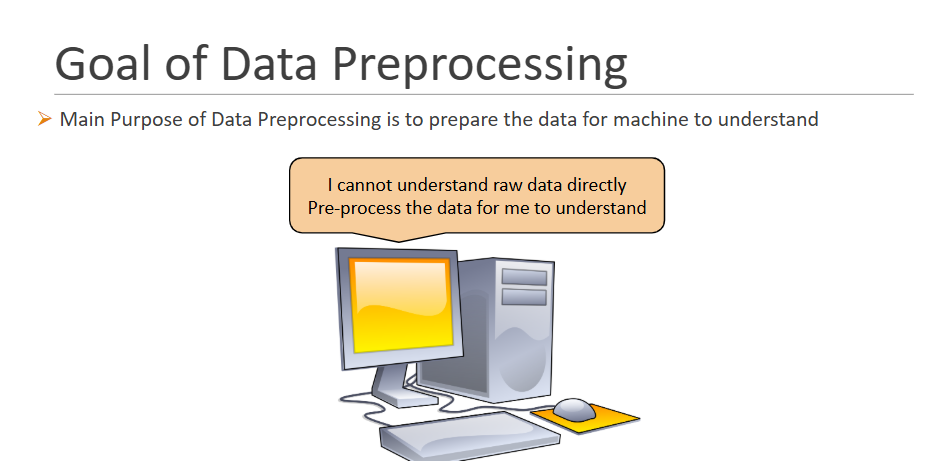

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/50_Startups.csv"
)
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

## Separate X and Y features

In [5]:
X = df.drop(columns=["PROFIT"])
Y = df[["PROFIT"]]

In [6]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [7]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Separate categorical and continuous features

In [8]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [9]:
cat

['STATE']

In [10]:
con

['RND', 'ADMIN', 'MKT']

## Build pipelines to handle Data Cleaning and Data Preprocessing
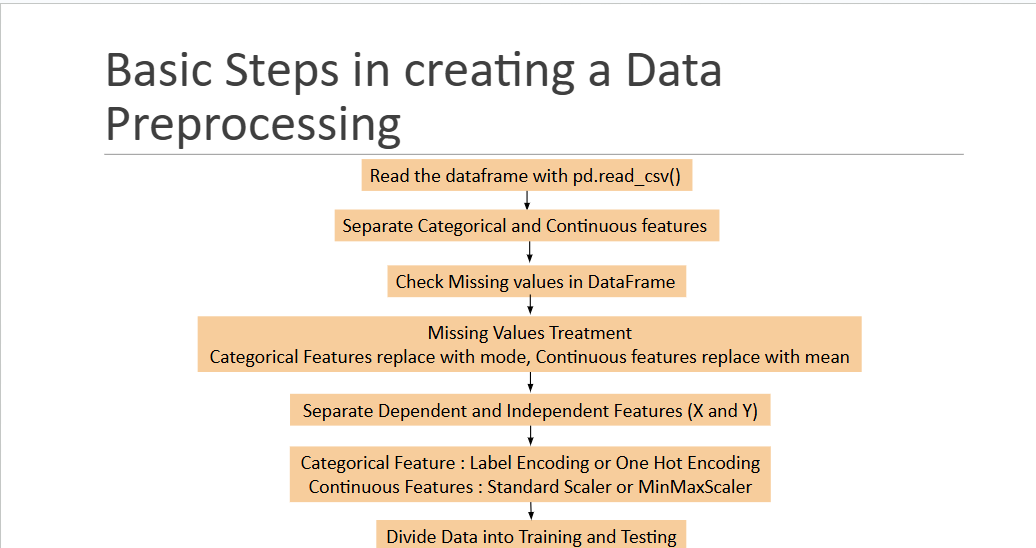

In [11]:
# TO create pipelines
from sklearn.pipeline import make_pipeline

# to preprocess categorical and continuous data
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# to perform data cleaning
from sklearn.impute import SimpleImputer

# to combine categorical and continuous pipelines
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

    state : california, florida, new york
    What if in future, there are startups from other states
    california      florida     new york
    1               0           0
    0               1           0
    0               1           0
    0               0           1
    0               0           1
    0               1           0
    0               1           0

In [13]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)

In [16]:
pre = ColumnTransformer([("num", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['STATE'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Model Building

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X_pre, Y)

LinearRegression()

In [21]:
model.score(X_pre, Y)

0.9507524843355148

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
ypreds = model.predict(X_pre)

In [25]:
ypreds[:5]

array([[192390.57136321],
       [189071.32010493],
       [182276.18673285],
       [173584.97618975],
       [172277.13381668]])

In [26]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [27]:
MSE = mean_squared_error(Y, ypreds)
MAE = mean_absolute_error(Y, ypreds)
RMSE = MSE ** (1 / 2)
r2 = r2_score(Y, ypreds)

In [28]:
print(f"MSE: {MSE}")
print(f"MAE: {MAE}")
print(f"RMSE: {RMSE}")
print(f"R2 score: {r2}")

MSE: 78406792.88803765
MAE: 6475.500708609337
RMSE: 8854.761029414496
R2 score: 0.9507524843355148


## Above model can be considered for final predictions